In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
train= pd.read_csv("SalaryData_Train(1).csv")
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
test=pd.read_csv("SalaryData_Test(1).csv")
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
train.shape

(30161, 14)

In [5]:
test.shape

(15060, 14)

In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train["workclass"] = label_encoder.fit_transform(train["workclass"])
train["education"] = label_encoder.fit_transform(train["education"])
train["maritalstatus"] = label_encoder.fit_transform(train["maritalstatus"])
train["occupation"] = label_encoder.fit_transform(train["occupation"])
train["relationship"] = label_encoder.fit_transform(train["relationship"])
train["race"] = label_encoder.fit_transform(train["race"])
train["sex"] = label_encoder.fit_transform(train["sex"])
train["native"] = label_encoder.fit_transform(train["native"])
train["Salary"] = label_encoder.fit_transform(train["Salary"])

In [7]:
test["workclass"] = label_encoder.fit_transform(test["workclass"])
test["education"] = label_encoder.fit_transform(test["education"])
test["maritalstatus"] = label_encoder.fit_transform(test["maritalstatus"])
test["occupation"] = label_encoder.fit_transform(test["occupation"])
test["relationship"] = label_encoder.fit_transform(test["relationship"])
test["race"] = label_encoder.fit_transform(test["race"])
test["sex"] = label_encoder.fit_transform(test["sex"])
test["native"] = label_encoder.fit_transform(test["native"])
test["Salary"] = label_encoder.fit_transform(test["Salary"])


In [8]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [9]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


<AxesSubplot:xlabel='education'>

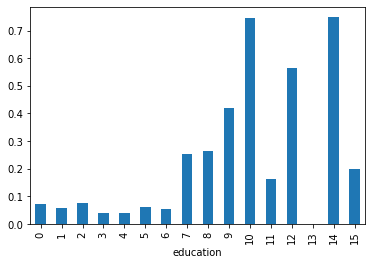

In [10]:
train.groupby('education').Salary.mean().plot(kind='bar')


<AxesSubplot:>

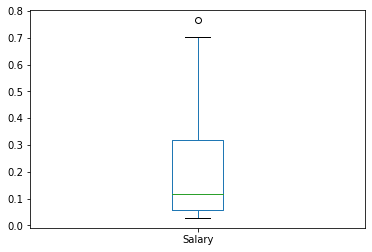

In [11]:
test.groupby('education').Salary.mean().plot(kind='box')


<AxesSubplot:xlabel='education'>

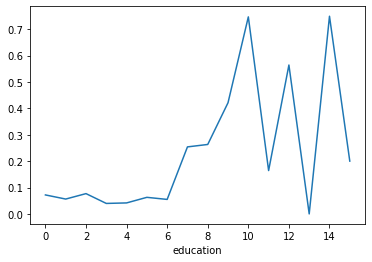

In [12]:
train.groupby('education').Salary.mean().plot(kind='line')

<AxesSubplot:ylabel='Frequency'>

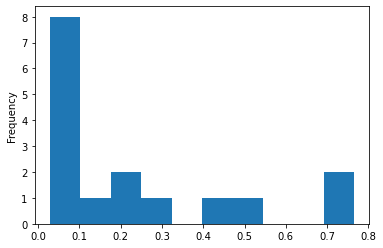

In [13]:
test.groupby('education').Salary.mean().plot(kind='hist')

<AxesSubplot:ylabel='Density'>

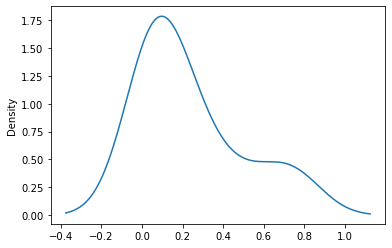

In [14]:
train.groupby('education').Salary.mean().plot(kind='density')


In [15]:
X_train=train.iloc[:,:-1]
X_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [16]:
y_train=train.iloc[:,-1]
y_train

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

In [17]:
X_test=test.iloc[:,:-1]
X_test
y_test=test.iloc[:,-1]
y_test

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int32

In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((30161, 13), (30161,), (15060, 13), (15060,))

In [ ]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

In [ ]:
gsv.best_params_ , gsv.best_score_

In [ ]:
clf = SVC(C= 15, gamma = 50)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

In [ ]:
salary = pd.merge(train,test)

In [ ]:
salary

In [ ]:
X=salary.iloc[:,:-1]
X

In [20]:
y=salary.iloc[:,-1]
y


NameError: name 'salary' is not defined

In [21]:
clf1 = SVC(C= 15, gamma = 50)
clf1.fit(X , y)
y_pred = clf1.predict(X)
acc1 = accuracy_score(y, y_pred) * 100
print("Accuracy =", acc1)
confusion_matrix(y, y_pred)

NameError: name 'X' is not defined